In [1]:
import openpyxl
from openpyxl.styles import Font
from openpyxl.worksheet.hyperlink import Hyperlink


In [2]:
def present_value_annuity(payment, rate, periods):
    """Calculate the present value of an ordinary annuity."""
    if rate == 0:
        return payment * periods
    else:
        return payment * (1 - (1 + rate) ** -periods) / rate


In [3]:
payment = 1000  # Fixed payment per period
rate = 0.05  # 5% annual interest rate
periods = 10  # 10 years


In [4]:
pv = present_value_annuity(payment, rate, periods)

In [5]:
wb = openpyxl.Workbook()
ws = wb.active
ws.title = "Annuity Calculation"


In [6]:
headers = ["Payment ($)", "Rate (%)", "Periods", "Present Value ($)"]
ws.append(headers)

In [7]:
for col in range(1, 5):
    ws.cell(row=1, column=col).font = Font(bold=True)


In [8]:
ws.append([payment, rate * 100, periods, round(pv, 2)])

In [9]:
colab_link = "https://colab.research.google.com/drive/YOUR_NOTEBOOK_ID"
ws.cell(row=3, column=1, value="Open Google Colab").hyperlink = colab_link
ws.cell(row=3, column=1).font = Font(color="0000FF", underline="single")


In [10]:
file_path = "/content/annuity_calculations.xlsx"
wb.save(file_path)

In [11]:
print(f"Excel file saved at: {file_path}")

Excel file saved at: /content/annuity_calculations.xlsx


In [12]:
def bond_price(face_value, coupon_rate, market_rate, years, payments_per_year):
    """Calculate bond price with periodic coupon payments."""
    coupon_payment = (coupon_rate / payments_per_year) * face_value
    discount_rate = market_rate / payments_per_year
    price = sum(coupon_payment / (1 + discount_rate) ** i for i in range(1, years * payments_per_year + 1))
    price += face_value / (1 + discount_rate) ** (years * payments_per_year)
    return round(price, 2)

# Example calculation
bond_price(face_value=1000, coupon_rate=0.05, market_rate=0.04, years=10, payments_per_year=2)


1081.76

In [13]:
def bond_duration(face_value, coupon_rate, market_rate, years, payments_per_year):
    """Calculate Macaulay Duration of a bond."""
    coupon_payment = (coupon_rate / payments_per_year) * face_value
    discount_rate = market_rate / payments_per_year
    price = 0
    duration = 0

    for i in range(1, years * payments_per_year + 1):
        weight = i / payments_per_year
        price += coupon_payment / (1 + discount_rate) ** i
        duration += (weight * coupon_payment) / (1 + discount_rate) ** i

    weight = years
    price += face_value / (1 + discount_rate) ** (years * payments_per_year)
    duration += (weight * face_value) / (1 + discount_rate) ** (years * payments_per_year)

    return round(duration / price, 2)

# Example calculation
bond_duration(face_value=1000, coupon_rate=0.05, market_rate=0.04, years=10, payments_per_year=2)


8.08

In [18]:
def bond_price(yield_rate, face_value, coupon_rate, years, freq, market_price):
    """Compute bond price given a yield."""
    total_periods = years * freq
    coupon_payment = (coupon_rate * face_value) / freq
    price = sum([coupon_payment / (1 + yield_rate / freq) ** t for t in range(1, total_periods + 1)])
    price += face_value / (1 + yield_rate / freq) ** total_periods
    return price - market_price  # Difference from actual price (for root finding)

In [19]:
def bisection_ytm(face_value, coupon_rate, years, freq, market_price, tol=1e-6):
    """Use the Bisection Method to find YTM."""
    low, high = 0, 1  # Initial bounds for YTM (0% to 100%)

    while high - low > tol:
        mid = (low + high) / 2
        price_diff = bond_price(mid, face_value, coupon_rate, years, freq, market_price)

        if abs(price_diff) < tol:  # Root found
            return mid
        elif price_diff > 0:
            low = mid  # Yield is too low
        else:
            high = mid  # Yield is too high

    return (low + high) / 2  # Return approximate YTM

In [20]:
face_value = 1000      # Face value of the bond
coupon_rate = 0.05     # 5% annual coupon rate
years = 10             # Maturity in years
freq = 2              # Semi-annual coupon payments
market_price = 1081.76  # Market price of the bond


In [21]:
ytm = bisection_ytm(face_value, coupon_rate, years, freq, market_price)
print(f"Yield to Maturity (YTM): {ytm * 100:.4f}%")

Yield to Maturity (YTM): 3.9999%


In [22]:
import pandas as pd

In [23]:
def mortgage_payment(loan_amount, annual_rate, months):
    """Calculate fixed monthly mortgage payment."""
    monthly_rate = annual_rate / 12 / 100
    return loan_amount * monthly_rate / (1 - (1 + monthly_rate) ** -months)

In [24]:
def generate_amortization_schedule(loan_amount, annual_rate, term_years):
    """Generate mortgage amortization schedule."""
    months = term_years * 12
    monthly_payment = mortgage_payment(loan_amount, annual_rate, months)
    monthly_rate = annual_rate / 12 / 100
    schedule = []

    balance = loan_amount
    for i in range(1, months + 1):
        interest_paid = balance * monthly_rate
        principal_paid = monthly_payment - interest_paid
        balance -= principal_paid
        schedule.append([i, loan_amount, monthly_payment, interest_paid, principal_paid, balance])

    return pd.DataFrame(schedule, columns=["Month", "Beginning Balance", "Payment", "Interest Paid", "Principal Paid", "Ending Balance"])


In [25]:
loan_amount = 300000
annual_rate = 5
term_years = 30


In [26]:
df = generate_amortization_schedule(loan_amount, annual_rate, term_years)
print(df.head(12))  # Print first 12 months

    Month  Beginning Balance      Payment  Interest Paid  Principal Paid  \
0       1             300000  1610.464869    1250.000000      360.464869   
1       2             300000  1610.464869    1248.498063      361.966806   
2       3             300000  1610.464869    1246.989868      363.475001   
3       4             300000  1610.464869    1245.475389      364.989480   
4       5             300000  1610.464869    1243.954599      366.510270   
5       6             300000  1610.464869    1242.427473      368.037396   
6       7             300000  1610.464869    1240.893984      369.570885   
7       8             300000  1610.464869    1239.354105      371.110764   
8       9             300000  1610.464869    1237.807811      372.657058   
9      10             300000  1610.464869    1236.255073      374.209796   
10     11             300000  1610.464869    1234.695865      375.769004   
11     12             300000  1610.464869    1233.130161      377.334708   

    Ending 

In [27]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [28]:
stocks = ["AAPL", "MSFT", "TSLA", "GOOGL", "AMZN", "META", "NVDA", "JPM", "NFLX", "BRK-B"]

In [30]:
import yfinance as yf
import pandas as pd

In [31]:
stocks = ["AAPL", "MSFT", "TSLA", "GOOGL", "AMZN", "META", "NVDA", "JPM", "NFLX", "BRK-B"]

# Download data with auto_adjust=False to get "Adj Close"
data = yf.download(stocks, start="2023-03-01", end="2024-03-01", auto_adjust=False)

# Select the "Adj Close" column
adj_close = data["Adj Close"]
print(adj_close.head())

[*********************100%***********************]  10 of 10 completed

Ticker            AAPL       AMZN       BRK-B      GOOGL         JPM  \
Date                                                                   
2023-03-01  143.859207  92.169998  304.619995  89.930054  135.494293   
2023-03-02  144.453247  92.129997  307.750000  91.562241  134.087540   
2023-03-03  149.522110  94.900002  312.450012  93.204391  136.549347   
2023-03-06  152.294159  93.750000  316.970001  94.677353  135.750946   
2023-03-07  150.086441  93.550003  311.119995  93.413406  131.758804   

Ticker            META        MSFT        NFLX       NVDA        TSLA  
Date                                                                   
2023-03-01  172.606506  242.414490  313.480011  22.679419  202.770004  
2023-03-02  173.711288  247.178726  311.880005  23.294912  190.899994  
2023-03-03  184.380997  251.293289  315.179993  23.870441  197.789993  
2023-03-06  184.032639  252.848557  312.029999  23.534714  193.809998  
2023-03-07  183.644470  250.171112  308.470001  23.272888  187.

In [32]:
data = yf.download(stocks, start="2023-03-01", end="2024-03-01")

[*********************100%***********************]  10 of 10 completed


In [33]:
close_prices = data["Close"]
print(close_prices.head())

Ticker            AAPL       AMZN       BRK-B      GOOGL         JPM  \
Date                                                                   
2023-03-01  143.859207  92.169998  304.619995  89.930054  135.494293   
2023-03-02  144.453247  92.129997  307.750000  91.562241  134.087540   
2023-03-03  149.522110  94.900002  312.450012  93.204391  136.549347   
2023-03-06  152.294159  93.750000  316.970001  94.677353  135.750946   
2023-03-07  150.086441  93.550003  311.119995  93.413406  131.758804   

Ticker            META        MSFT        NFLX       NVDA        TSLA  
Date                                                                   
2023-03-01  172.606506  242.414490  313.480011  22.679419  202.770004  
2023-03-02  173.711288  247.178726  311.880005  23.294912  190.899994  
2023-03-03  184.380997  251.293289  315.179993  23.870441  197.789993  
2023-03-06  184.032639  252.848557  312.029999  23.534714  193.809998  
2023-03-07  183.644470  250.171112  308.470001  23.272888  187.

In [34]:
# Compute daily log returns
returns = np.log(data / data.shift(1))

# Drop NaN values from the first row
returns = returns.dropna()
returns.head()


Price          Close                                                    \
Ticker          AAPL      AMZN     BRK-B     GOOGL       JPM      META   
Date                                                                     
2023-03-02  0.004121 -0.000434  0.010223  0.017987 -0.010437  0.006380   
2023-03-03  0.034488  0.029623  0.015157  0.017776  0.018193  0.059610   
2023-03-06  0.018370 -0.012192  0.014363  0.015680 -0.005864 -0.001891   
2023-03-07 -0.014603 -0.002136 -0.018628 -0.013440 -0.029849 -0.002111   
2023-03-08  0.008342  0.003947  0.000803  0.004146 -0.005933  0.002490   

Price                                               ...    Volume            \
Ticker          MSFT      NFLX      NVDA      TSLA  ...      AAPL      AMZN   
Date                                                ...                       
2023-03-02  0.019463 -0.005117  0.026777 -0.060323  ... -0.060192  0.059566   
2023-03-03  0.016509  0.010525  0.024406  0.035456  ...  0.303090  0.004497   
2023-03-06  0.006170 -0.010045 -0.014164 -0.020328  ...  0.213399 -0.067647   
2023-03-07 -0.010646 -0.011475 -0.011187 -0.031980  ... -0.443705 -0.059530   
2023-03-08 -0.001772  0.010705  0.037629 -0.030892  ... -0.174101 -0.089456   

Price                                                                   \
Ticker         BRK-B     GOOGL       JPM      META      MSFT      NFLX   
Date                                                                     
2023-03-02 -0.074883  0.034535  0.441957 -0.580228 -0.105383 -0.000061   
2023-03-03  0.354452  0.087809 -0.154888  0.972271  0.215044  0.192468   
2023-03-06  0.084631 -0.074395 -0.026825 -0.323146 -0.243600 -0.050398   
2023-03-07 -0.303527 -0.159205  0.237805  0.099985 -0.115813 -0.217739   
2023-03-08 -0.289780  0.203082 -0.160814 -0.635876 -0.213778 -0.268920   

Price                           
Ticker          NVDA      TSLA  
Date                            
2023-03-02 -0.166637  0.145952  
2023-03-03  0.057331 -0.163053  
2023-03-06  0.058938 -0.185395  
2023-03-07  0.163551  0.145250  
2023-03-08 -0.003074  0.025146  

[5 rows x 50 columns]

In [35]:
# Compute the variance-covariance matrix
cov_matrix = returns.cov()
print("Variance-Covariance Matrix:\n", cov_matrix)


Variance-Covariance Matrix:
 Price             Close                                                  \
Ticker             AAPL      AMZN         BRK-B         GOOGL       JPM   
Price  Ticker                                                             
Close  AAPL    0.000145  0.000094  3.319404e-05  1.049022e-04  0.000035   
       AMZN    0.000094  0.000364  3.228609e-05  1.869760e-04  0.000027   
       BRK-B   0.000033  0.000032  7.204366e-05  4.340810e-05  0.000067   
       GOOGL   0.000105  0.000187  4.340810e-05  3.097493e-04  0.000034   
       JPM     0.000035  0.000027  6.683722e-05  3.369090e-05  0.000160   
       META    0.000121  0.000268  6.396066e-05  1.984629e-04  0.000064   
       MSFT    0.000090  0.000151  2.309837e-05  1.188564e-04  0.000011   
       NFLX    0.000107  0.000153  4.281374e-05  1.252659e-04  0.000036   
       NVDA    0.000143  0.000225  5.220823e-05  2.079713e-04  0.000081   
       TSLA    0.000135  0.000201  5.845360e-05  1.434735e-04  0.000116

In [39]:
import yfinance as yf
import numpy as np
import pandas as pd

# Define stock tickers
stocks = ["AAPL", "MSFT", "TSLA", "GOOGL", "AMZN", "META", "NVDA", "JPM", "NFLX", "BRK-B"]

# Download stock price data
data = yf.download(stocks, start="2023-03-01", end="2024-03-01")["Close"]

# Compute daily log returns
returns = np.log(data / data.shift(1)).dropna()
print(returns.head())


[*********************100%***********************]  10 of 10 completed


Ticker          AAPL      AMZN     BRK-B     GOOGL       JPM      META  \
Date                                                                     
2023-03-02  0.004121 -0.000434  0.010223  0.017987 -0.010437  0.006380   
2023-03-03  0.034488  0.029623  0.015157  0.017776  0.018193  0.059610   
2023-03-06  0.018370 -0.012192  0.014363  0.015680 -0.005864 -0.001891   
2023-03-07 -0.014603 -0.002136 -0.018628 -0.013440 -0.029849 -0.002111   
2023-03-08  0.008342  0.003947  0.000803  0.004146 -0.005933  0.002490   

Ticker          MSFT      NFLX      NVDA      TSLA  
Date                                                
2023-03-02  0.019463 -0.005117  0.026777 -0.060323  
2023-03-03  0.016509  0.010525  0.024406  0.035456  
2023-03-06  0.006170 -0.010045 -0.014164 -0.020328  
2023-03-07 -0.010646 -0.011475 -0.011187 -0.031980  
2023-03-08 -0.001772  0.010705  0.037629 -0.030892  


In [40]:
# Compute the variance-covariance matrix
cov_matrix = returns.cov()
print(cov_matrix)


Ticker      AAPL      AMZN     BRK-B     GOOGL       JPM      META      MSFT  \
Ticker                                                                         
AAPL    0.000145  0.000094  0.000033  0.000105  0.000035  0.000121  0.000090   
AMZN    0.000094  0.000364  0.000032  0.000187  0.000027  0.000268  0.000151   
BRK-B   0.000033  0.000032  0.000072  0.000043  0.000067  0.000064  0.000023   
GOOGL   0.000105  0.000187  0.000043  0.000310  0.000034  0.000198  0.000119   
JPM     0.000035  0.000027  0.000067  0.000034  0.000160  0.000064  0.000011   
META    0.000121  0.000268  0.000064  0.000198  0.000064  0.000513  0.000169   
MSFT    0.000090  0.000151  0.000023  0.000119  0.000011  0.000169  0.000202   
NFLX    0.000107  0.000153  0.000043  0.000125  0.000036  0.000168  0.000129   
NVDA    0.000143  0.000225  0.000052  0.000208  0.000081  0.000291  0.000213   
TSLA    0.000135  0.000201  0.000058  0.000143  0.000116  0.000242  0.000121   

Ticker      NFLX      NVDA      TSLA  


In [41]:
# Assign equal weights
n_assets = len(stocks)
weights = np.array([1/n_assets] * n_assets)

# Compute portfolio variance
portfolio_variance = np.dot(weights.T, np.dot(cov_matrix, weights))
portfolio_volatility = np.sqrt(portfolio_variance)

print(f"Portfolio Volatility: {portfolio_volatility}")


Portfolio Volatility: 0.012270176460695817


In [42]:
from scipy.stats import norm

# Calculate portfolio standard deviation for a single day
portfolio_std = np.sqrt(portfolio_variance)

# 10-day VaR at 99% confidence
z_score = norm.ppf(0.01)  # 1% level (left-tail)
VaR_10d = z_score * portfolio_std * np.sqrt(10)

print(f"10-Day VaR (99% confidence): {VaR_10d}")


10-Day VaR (99% confidence): -0.09026626372184467


In [43]:
# CVaR formula (expected loss beyond VaR threshold)
CVaR_10d = -(1 / (1 - 0.99)) * norm.pdf(z_score) * portfolio_std * np.sqrt(10)

print(f"10-Day CVaR (99% confidence): {CVaR_10d}")


10-Day CVaR (99% confidence): -0.10341485569441607


In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm

In [45]:
def hull_white_eso(S, K, T, r, sigma, vesting_period, early_exercise_factor):
    """
    Hull-White (2004) model for valuing Executive Stock Options (ESOs).

    Parameters:
    S : float  -> Current stock price
    K : float  -> Strike price
    T : float  -> Time to maturity (years)
    r : float  -> Risk-free interest rate (as decimal)
    sigma : float  -> Volatility of stock price (as decimal)
    vesting_period : float  -> Vesting period (years)
    early_exercise_factor : float  -> Factor to model early exercise behavior (0 to 1)

    Returns:
    ESO value (float)
    """

    # Adjusted time to maturity considering early exercise
    adjusted_T = max(T - vesting_period, 0) * early_exercise_factor

    # Compute d1 and d2 using Black-Scholes framework
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * adjusted_T) / (sigma * np.sqrt(adjusted_T))
    d2 = d1 - sigma * np.sqrt(adjusted_T)

    # Compute ESO price (adjusting for vesting)
    ESO_value = (S * norm.cdf(d1) - K * np.exp(-r * adjusted_T) * norm.cdf(d2)) * np.exp(-r * vesting_period)

    return max(ESO_value, 0)  # Ensure non-negative option value

In [46]:
S = 100  # Current stock price
K = 100  # Strike price
T = 5    # Maturity in years
r = 0.03  # Risk-free rate
vesting_period = 2  # Vesting period in years
early_exercise_factor = 0.8  # Factor for early exercise behavior


In [47]:
volatility_values = np.linspace(0.1, 0.6, 50)
eso_values = [hull_white_eso(S, K, T, r, sigma, vesting_period, early_exercise_factor) for sigma in volatility_values]


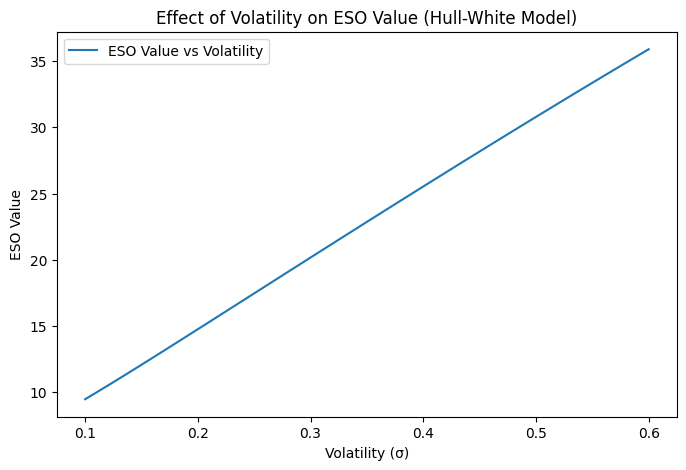

In [48]:
plt.figure(figsize=(8,5))
plt.plot(volatility_values, eso_values, label="ESO Value vs Volatility")
plt.xlabel("Volatility (σ)")
plt.ylabel("ESO Value")
plt.title("Effect of Volatility on ESO Value (Hull-White Model)")
plt.legend()
plt.show()

In [53]:
sigma = 0.2  # Volatility (define this!)

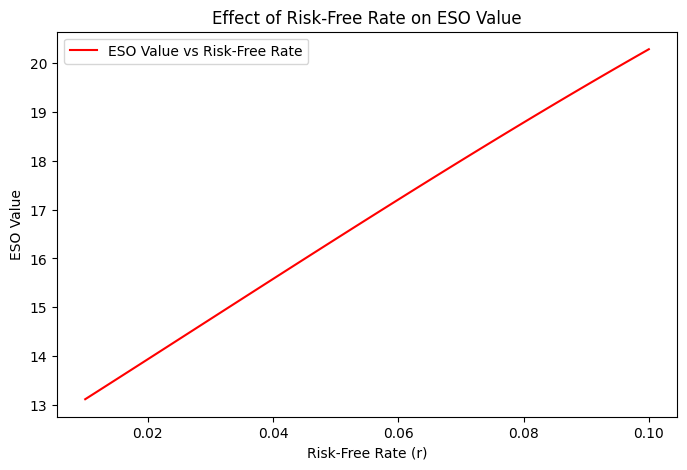

In [54]:
risk_free_rates = np.linspace(0.01, 0.1, 50)  # Range of risk-free rates
eso_values_rf = [hull_white_eso(S, K, T, rf, sigma, vesting_period, early_exercise_factor) for rf in risk_free_rates]

plt.figure(figsize=(8,5))
plt.plot(risk_free_rates, eso_values_rf, label="ESO Value vs Risk-Free Rate", color="red")
plt.xlabel("Risk-Free Rate (r)")
plt.ylabel("ESO Value")
plt.title("Effect of Risk-Free Rate on ESO Value")
plt.legend()
plt.show()


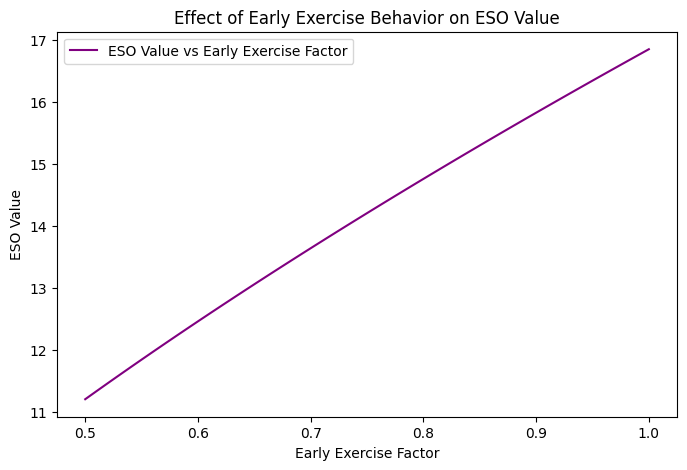

In [55]:
early_exercise_factors = np.linspace(0.5, 1, 50)
eso_values_exercise = [hull_white_eso(S, K, T, r, sigma, vesting_period, e) for e in early_exercise_factors]

plt.figure(figsize=(8,5))
plt.plot(early_exercise_factors, eso_values_exercise, label="ESO Value vs Early Exercise Factor", color="purple")
plt.xlabel("Early Exercise Factor")
plt.ylabel("ESO Value")
plt.title("Effect of Early Exercise Behavior on ESO Value")
plt.legend()
plt.show()
